<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Ensemble_Trees_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun
- 06/29/22

Your task is to create the best possible model to predict house prices.

1. Try a Decision Tree, Bagged Tree, and Random Forest.

2. Tune each model to optimize performance on the test set.

3. Evaluate your best model using multiple regression metrics

4. Explain in a text cell how your model will perform if deployed by referring to the metrics. 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [14]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/Boston_Housing_from_Sklearn.csv')

In [15]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [16]:
# split X and y
X = df.drop(columns=['PRICE','CRIM','NOX','AGE',])
y = df['PRICE']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Trying Descision Tree - 

In [17]:
#Making Dec Tree model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [18]:
#Fitting model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
#Predicting target values for training and test set
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [20]:
# evaluating the model results
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.4526070862755007


Not the best. Seems to be overfitted. Predicting all training data correct but test data less than 50%.

In [21]:
#Checking for parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [22]:
depths = list(range(2, 40)) # will try every value between 2 and 40
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

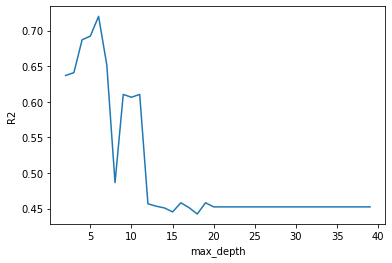

In [23]:
#Using plot to see result
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [24]:
#Using dataframe to sort results
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.720032,0.720032
5,0.692269,0.692269
4,0.68715,0.68715
7,0.651788,0.651788
3,0.641014,0.641014


The depth of 6 showed the best result for both test and train data using decision tree.

1. Trying Bagged Trees -

In [25]:
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [26]:
# Make an instance of the Model
bagreg = BaggingRegressor(random_state = 42)

In [27]:
#Fitting model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [28]:
#Predict results
bagreg.predict(X_test)

array([22.52, 31.02, 18.14, 23.9 , 15.36, 21.42, 20.42, 13.29, 21.32,
       21.63, 21.8 , 17.69, 11.62, 21.42, 17.49, 27.76, 20.98,  8.85,
       48.46, 15.96, 23.33, 23.29, 12.59, 23.6 , 14.82, 14.69, 29.52,
       15.85, 19.39, 20.68, 19.87, 22.83, 29.45, 20.41, 11.5 , 17.66,
       34.56, 29.42, 18.27, 23.53, 17.87, 28.08, 48.46, 23.51, 25.32,
       13.98, 16.03, 23.04, 15.34, 29.22, 22.56, 35.91, 18.86, 25.95,
       42.  , 21.44, 14.73, 30.04, 24.33, 19.85, 26.81, 35.22, 28.25,
       19.51, 25.13, 19.62, 15.4 , 23.07, 25.96, 22.38, 20.36, 26.12,
       10.13, 21.79, 21.26,  8.03, 21.54, 49.54, 12.94, 11.96, 23.58,
        8.34, 30.13,  8.84, 20.45, 26.37, 13.47, 23.45, 23.35, 16.84,
       22.15,  7.9 , 19.79, 20.92, 38.25, 19.51, 21.94, 10.19, 15.27,
       13.31, 19.51, 25.61, 12.  , 26.44, 18.96, 11.67, 19.35, 26.02,
       18.18, 23.25,  6.16, 13.  , 22.34, 21.98, 34.87, 14.49, 42.32,
       15.6 , 17.75, 24.05, 23.55, 24.45,  9.17, 20.82, 23.22, 19.44,
       24.36])

In [30]:
#Evaluate your model performance
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9589474812896627
0.6810228787398808


Is not bad, but i think can predict better for test data. So will change parameters for the best result. Will change n_estimators from only 10 to include 20, 30, 40, 50, and 100.

In [29]:
#Checking parameters
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]

scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

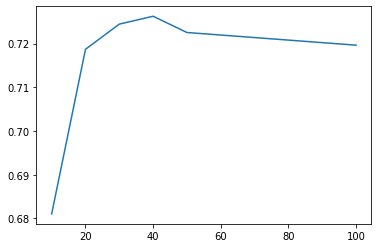

In [32]:
plt.plot(scores['Test Score'])
plt.show()

In [33]:
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
40,0.97047,0.726255
30,0.96873,0.724454
50,0.970968,0.722536
100,0.973254,0.719636
20,0.96859,0.718694
10,0.958947,0.681023


The n estimator of 40 showed the best results. Slightly better than 10 for test data.

1. Trying Random Forests -

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
#Making instance of the Model
rf = RandomForestRegressor(random_state = 42)

In [36]:
#fitting to model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
#Predicting the values for y 
rf.predict(X_test)

array([22.219, 31.851, 17.69 , 24.189, 14.647, 20.756, 19.719, 12.907,
       21.452, 21.719, 19.915, 19.218, 12.467, 21.029, 17.591, 25.501,
       20.927,  8.507, 47.621, 15.667, 23.822, 23.375, 12.003, 22.383,
       14.924, 15.505, 30.201, 15.621, 20.092, 20.822, 18.988, 23.251,
       27.037, 20.978, 11.55 , 17.275, 35.818, 22.98 , 19.644, 23.389,
       18.256, 28.057, 46.257, 23.27 , 24.541, 15.265, 16.068, 23.248,
       14.938, 29.483, 23.002, 35.318, 18.85 , 26.457, 44.175, 20.827,
       14.759, 32.364, 22.971, 20.536, 26.187, 34.437, 30.741, 19.252,
       27.195, 18.911, 15.161, 23.3  , 26.385, 20.66 , 21.089, 26.597,
       10.559, 23.233, 21.56 ,  7.754, 20.829, 48.825, 12.774, 11.453,
       23.502,  8.045, 30.079,  8.865, 21.233, 26.43 , 14.145, 23.257,
       23.57 , 17.255, 21.463,  7.923, 19.149, 20.948, 28.907, 19.033,
       23.   , 11.469, 15.128, 12.923, 20.682, 29.342, 11.327, 22.534,
       20.946, 11.626, 17.924, 25.366, 20.643, 23.57 ,  7.108, 13.181,
      

In [38]:
#Evaluate your model performance
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9728543493496158
0.7185553579730205


Not bad. But may be better if depth is expanded to higher amount. Like 100.

In [39]:
#checking parameters 
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [41]:
depths = range(1, 100)
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

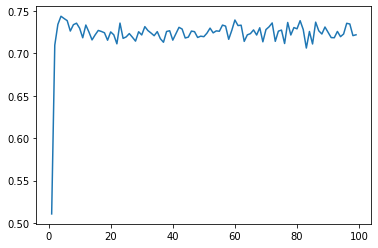

In [42]:
plt.plot(scores['Test Score'])

In [43]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.743745,0.889899
5,0.741051,0.914128
60,0.739304,0.968540
6,0.73856,0.935211
81,0.738505,0.971241


The depth of 4 predicted the test data better than the default. But not the train data. Will use loop and change n estimator to see if there is better results for both.

In [45]:
n_ests = [4, 50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
4,0.699686,0.949328
50,0.70811,0.973229
100,0.714453,0.973791
150,0.71516,0.972878
200,0.726587,0.97178


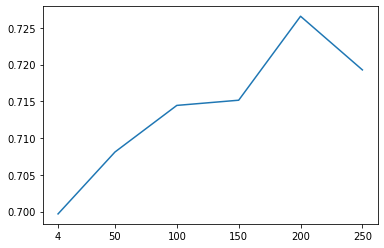

In [46]:
#plot the results
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [47]:
#puting results in database 
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
200,0.726587,0.97178
250,0.719284,0.974735
150,0.71516,0.972878
100,0.714453,0.973791
50,0.70811,0.973229


In [49]:
n_ests = [200]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
200,0.732551,0.973862


Looks like a n estimator of 200 predicts the test data best while also doing good on train data.

2. From Evaluation the best model is the random forests regressor. I will now be using multiple regression metrics to see how accurate the predictions are.

In [76]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression

In [77]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [78]:
#instantiate the encoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [79]:
num_tuple = (scaler, num_selector)
cat_tuple = (encoder, cat_selector)

In [80]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'drop')

In [81]:
# instantiate a baseline model
dummy_reg = DummyRegressor(strategy='mean')

# create model pipeline
base_pipe = make_pipeline(preprocessor, dummy_reg)

base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f932e7f38d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f932e7f3910>)])),
                ('dummyregressor', DummyRegressor())])

In [53]:
# defining a function for the metrics

def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [93]:
#Looking at baseline for both
print('Train Evaluation')
eval_regression(y_train, base_pipe.predict(X_train))

print('\nTest Evaluation')
eval_regression(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE 6.889290662136855,
 MSE 88.68173153904524,
 RMSE: 9.41709782996042,
 R^2: 0.0 

Test Evaluation
MAE 6.222778551097999,
 MSE 72.2607627995582,
 RMSE: 8.500633082280295,
 R^2: -0.03189647654769301 


In [86]:
#Instantiate scaler and model
scaler = StandardScaler()
RForest_reg = RandomForestRegressor()
RForest_reg_pipe = make_pipeline(scaler,RForest_reg)
#fit pipeline
RForest_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [87]:
#Create model predictions for training and test data
train_pred = RForest_reg_pipe.predict(X_train)
test_pred = RForest_reg_pipe.predict(X_test)

In [94]:
# Using Scikit-Learn metrics function for MAE
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
print(f'Model Traing MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Traing MAE: 1.0460026385224261
Model Testing MAE: 2.7620472440944885


In [95]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
print(f'Model Traing MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Traing MSE: 2.5173977229551445
Model Testing MSE: 19.277387700787408


In [96]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Model training RMSE: {train_RMSE}')
print(f'Model testing RMSE: {test_RMSE}')

Model training RMSE: 1.586630934702568
Model testing RMSE: 4.3906022025215865


In [91]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.9716131194185493
Model Testing R2: 0.7247154932384968


Based on R2, This score of 0.72 can be interpreted as saying that our model can account for about 72.8% of the variation in y_test using the features RM, PTRATIO, and LSTAT.

The MSE dramatically penalizes our large errors and would not be used. Since it shows 19 for the testing data.

The MAE is 2.74 and isn't as bad because it penalizes all errors proportionally.

The RMSE will be used since error on testing data is 4.39. Showing a Price error of about $4000 dollars. 
